Adult Income - Eugene Abigail Setiawan (0706022210061)

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [57]:
# Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/eabigails/Week-6_DM/refs/heads/main/adult.csv', delimiter=',')
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [58]:
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [59]:
print("Statistik Deskriptif:")
df.describe()

Statistik Deskriptif:


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [60]:
# Menghapus nilai kosong
print("Cek nilai kosong:")
df.dropna(inplace=True)
df.isnull().sum()

Cek nilai kosong:


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

C:\Users\yulia\AppData\Local\Temp\ipykernel_18184\1281263615.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


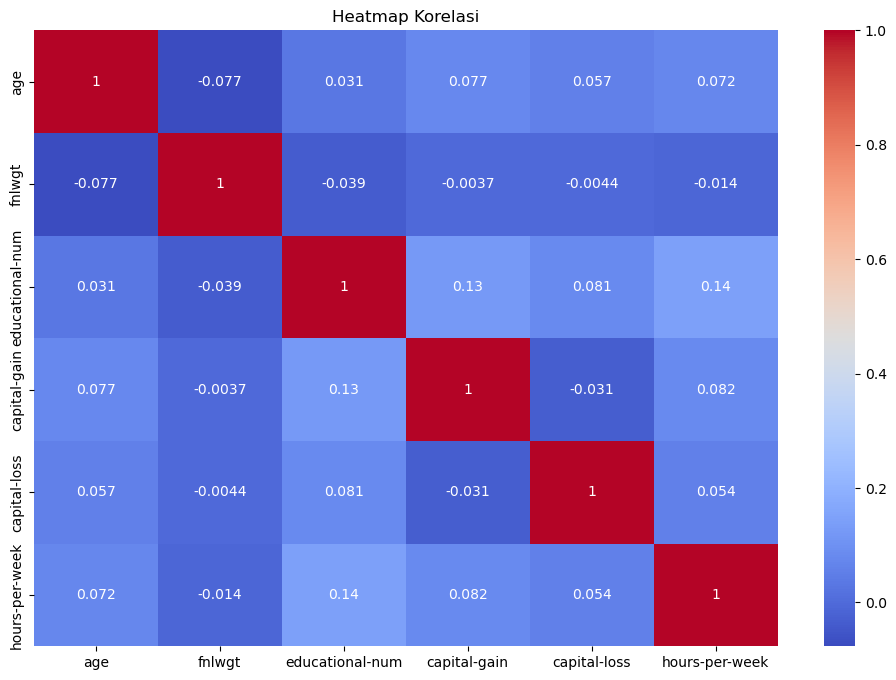

In [61]:
# Visualisasi heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

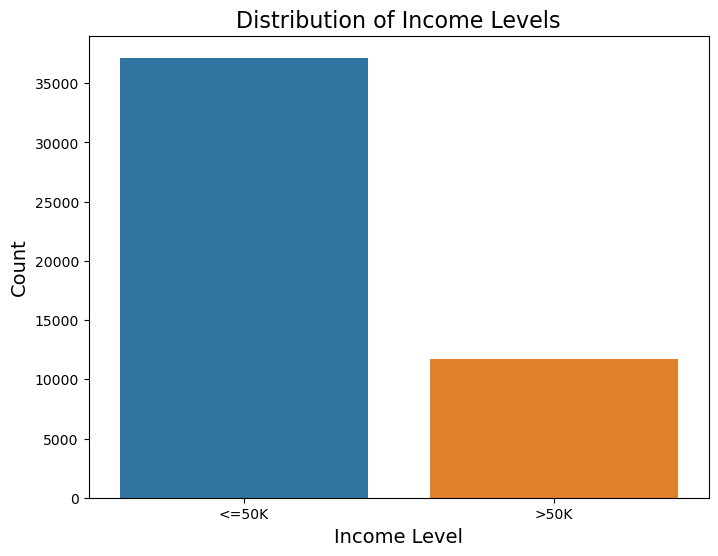

In [62]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='income')

plt.title('Distribution of Income Levels', fontsize=16)
plt.xlabel('Income Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [63]:
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])

# Gunakan OneHotEncoder untuk kolom-kolom kategori lainnya
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 
                                 'relationship', 'race', 'gender', 'native-country'], drop_first=True)


In [64]:
# Modeling
# Memisahkan fitur dan target
X = df.drop('income', axis=1)  # 'Outcome' adalah kolom target
y = df['income']

In [65]:
# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [66]:
X_train.shape, X_test.shape

((39073, 100), (9769, 100))

Decision Tree - Gini

In [67]:
# a. Define Model
gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [68]:
# b. Predict the test set results
y_pred_gini = gini.predict(X_test)

In [69]:
# c. Check Accuracy Score
print("Model accuracy score with gini index: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with gini index: 0.8515


In [70]:
# d. Check for overfitting and underfitting
print("Training set score: {:0.4f}".format(gini.score(X_train, y_train)))
print("Test set score: {:0.4f}".format(gini.score(X_test, y_test)))

Training set score: 0.8424
Test set score: 0.8515


[Text(0.5, 0.875, 'x[30] <= 0.5\ngini = 0.365\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[3] <= 7055.5\ngini = 0.121\nsamples = 21099\nvalue = [19731, 1368]'),
 Text(0.125, 0.375, 'x[2] <= 12.5\ngini = 0.094\nsamples = 20738\nvalue = [19718, 1020]'),
 Text(0.0625, 0.125, 'gini = 0.046\nsamples = 16630\nvalue = [16238, 392]'),
 Text(0.1875, 0.125, 'gini = 0.259\nsamples = 4108\nvalue = [3480, 628]'),
 Text(0.375, 0.375, 'x[0] <= 20.5\ngini = 0.069\nsamples = 361\nvalue = [13, 348]'),
 Text(0.3125, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.4375, 0.125, 'gini = 0.044\nsamples = 355\nvalue = [8, 347]'),
 Text(0.75, 0.625, 'x[2] <= 12.5\ngini = 0.494\nsamples = 17974\nvalue = [9945, 8029]'),
 Text(0.625, 0.375, 'x[3] <= 5095.5\ngini = 0.444\nsamples = 12630\nvalue = [8431, 4199]'),
 Text(0.5625, 0.125, 'gini = 0.42\nsamples = 12027\nvalue = [8421, 3606]'),
 Text(0.6875, 0.125, 'gini = 0.033\nsamples = 603\nvalue = [10, 593]'),
 Text(0.875, 0.375, 'x[3

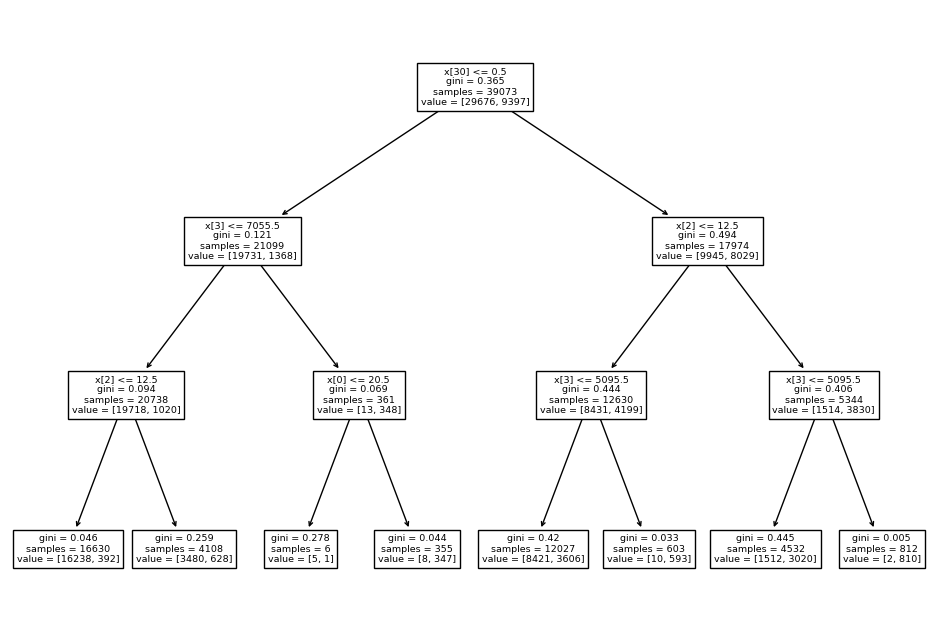

In [71]:
# e. Visualize decision trees
plt.figure(figsize=(12,8))
tree.plot_tree(gini.fit(X_train, y_train))

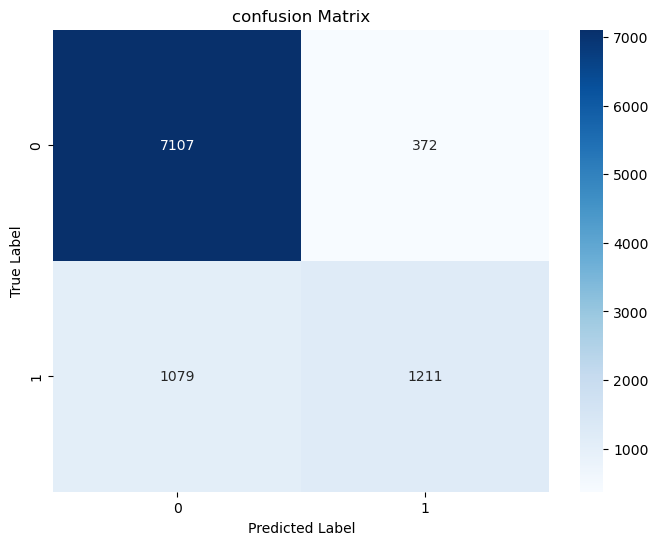

In [72]:
# f. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [73]:
print("Gini")
print(classification_report(y_test, y_pred_gini))


Gini
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7479
           1       0.77      0.53      0.63      2290

    accuracy                           0.85      9769
   macro avg       0.82      0.74      0.77      9769
weighted avg       0.84      0.85      0.84      9769



Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB
# a.
nb_classifer = GaussianNB()
nb_classifer.fit(X_train, y_train)

GaussianNB()

In [75]:
# b.
nb_y_pred = nb_classifer.predict(X_test)

In [76]:
# c. 
print("Model accuracy score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test, nb_y_pred)))

Model accuracy score with Naive Bayes: 0.7992


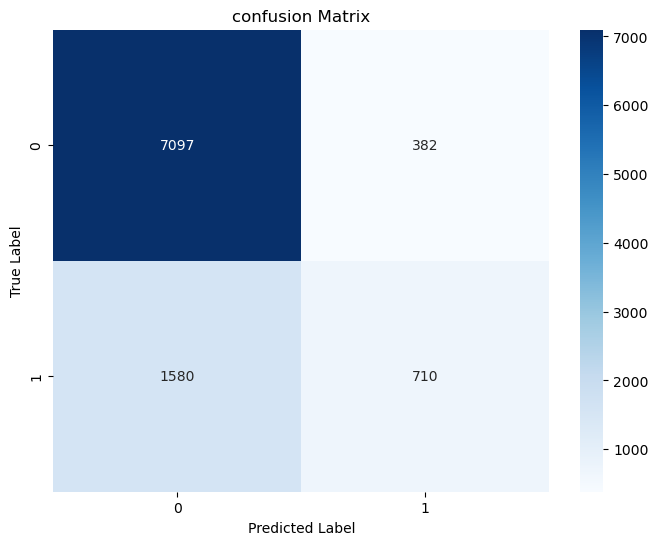

In [77]:
# d.
cm = confusion_matrix(y_test, nb_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [78]:
# e. Classification Report
print(classification_report(y_test, nb_y_pred))
print("Accuracy:", accuracy_score(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.65      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769

Accuracy: 0.7991606100931518


k-NN

In [80]:

# Pastikan X_train dan X_test adalah numpy arrays dengan layout memori yang benar
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

# Train dan evaluasi model KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Hasil
print("\nK-Nearest Neighbors - Classification Report")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))



K-Nearest Neighbors - Classification Report
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      7479
           1       0.56      0.34      0.42      2290

    accuracy                           0.78      9769
   macro avg       0.69      0.63      0.65      9769
weighted avg       0.76      0.78      0.76      9769

Accuracy: 0.7837035520524107


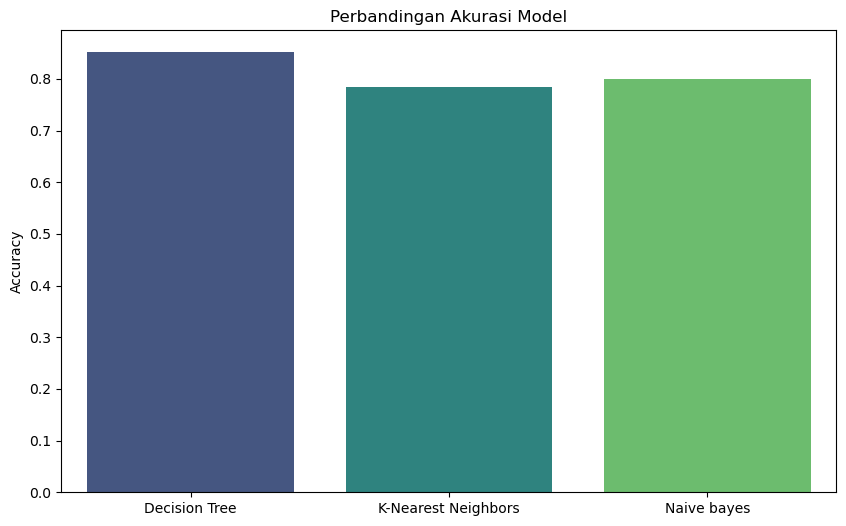

In [81]:
# Tabel perbandingan akurasi dari ketiga model
accuracy_scores = {
    "Decision Tree": accuracy_score(y_test, y_pred_gini),
    "K-Nearest Neighbors": accuracy_score(y_test, y_pred_knn),
    "Naive bayes": accuracy_score(y_test, nb_y_pred)
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Model")
plt.show()

With this we can conclude that Decision Tree is the most fitting to use for this dataset. Followed by Naive Bayes then Decision Tree.